<a href="https://colab.research.google.com/github/yasminbv/DataScience/blob/main/Homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

     |████████████████████████████████| 9.8 MB 14.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 1.4 MB 20.6 MB/s 


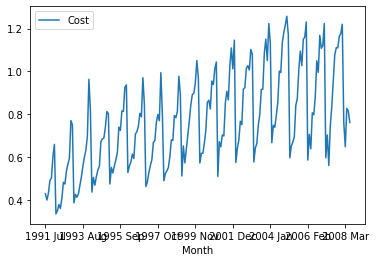

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set 
1)Test stationary of the 
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

H0:Series is not stationary

H1:Series is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
dap = dap - dap.shift(12)
dap.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dap['Cost'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dap['Cost'], lags=36)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(0,1,1),seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(1,1,1),seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(0,1,1),seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

In [ ]:
train=ap1[:-12]
test=ap1[-12:]
train

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Cost'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']

plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using SARIMA');

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using SARIMA');

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_prediction = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using Holt Winters');

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

In [ ]:
import numpy as np
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_prediction=ETSModel(train['Cost'],error='mul', trend='mul',seasonal='mul',damped_trend=True, seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS');

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using ETS');

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

In [ ]:
from tbats import TBATS, BATS
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=False,  
        use_box_cox=False 
)
model = estimator.fit(train)
test_prediction = model.forecast(steps=12)

test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using TBATS');

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Q10) SARIMA model showed the lowest MAPE score.